In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Number of actions
k = 10 

# Initialize action values with zero mean and unit variance
action_values = np.random.normal(0, 1, k)

action_values

array([ 0.03040702,  0.34274712, -0.69777109, -1.83901648,  0.39321474,
        0.08382953,  1.56027804,  1.41547667, -0.85001372, -1.38906577])

In [2]:
np.mean(action_values)

-0.09499139659332996

In [3]:
# Adjust action values so as to ensure they have zero mean
action_values-=np.mean(action_values)
action_values

array([ 0.12539842,  0.43773851, -0.6027797 , -1.74402509,  0.48820613,
        0.17882092,  1.65526944,  1.51046807, -0.75502233, -1.29407438])

In [4]:
np.mean(action_values)

4.4408920985006264e-17

In [5]:
# Generate rewards for each action based on action values
rewards = {action: np.random.normal(value, 1, 100) for action, value in enumerate(action_values)}
rewards

{0: array([-0.45822361,  1.03115524,  1.25439025,  0.45816067, -1.74512513,
         1.48436743,  0.37288857,  0.83837607,  1.33366064, -0.71459979,
        -0.90265548, -0.79176481,  1.05970877,  0.65552998,  2.37423485,
        -0.82435444, -0.47670476, -1.27413484,  0.76977641,  0.55289591,
         0.82368015, -0.7583639 ,  0.8402646 , -0.24407513,  0.03820564,
         0.75767294,  0.78178868, -0.47566556,  0.22439255, -1.40219366,
         0.53045221, -0.80271053,  0.9145425 ,  1.80420971,  1.53472051,
         0.01214751,  1.01501067, -0.90592909,  2.36563966,  0.02058098,
        -1.4674068 ,  0.1694633 , -0.43043331, -0.01854417, -1.0946627 ,
         0.07207483, -0.01326745,  2.05375315,  0.79585995, -1.48788868,
        -1.27286132, -0.03645204,  0.78850203,  1.35474336,  1.2299206 ,
         1.0347229 ,  0.52844435,  1.4545156 , -0.69890818,  1.33753776,
         0.12781847,  0.45474276,  0.3720734 , -1.32720471, -0.06627917,
         0.68198766,  1.76434883, -0.07497961,  

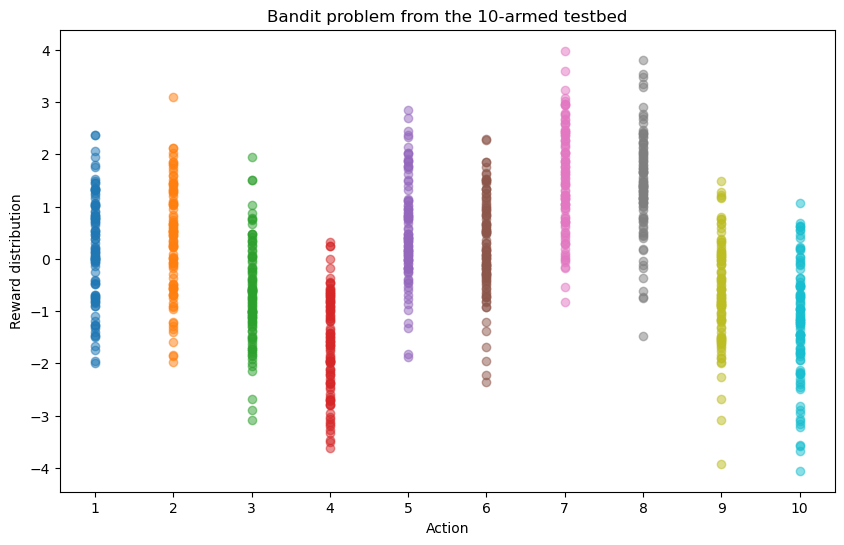

In [6]:
plt.figure(figsize=(10, 6))

# scatter plot for each action's reward distribution
for i in range(k):
    data = rewards[i]
    
    plt.scatter([i+1]*len(data), data, alpha=0.5)

plt.xticks(range(1, k+1))
plt.xlabel('Action')
plt.ylabel('Reward distribution')
plt.title('Bandit problem from the 10-armed testbed')
plt.show()


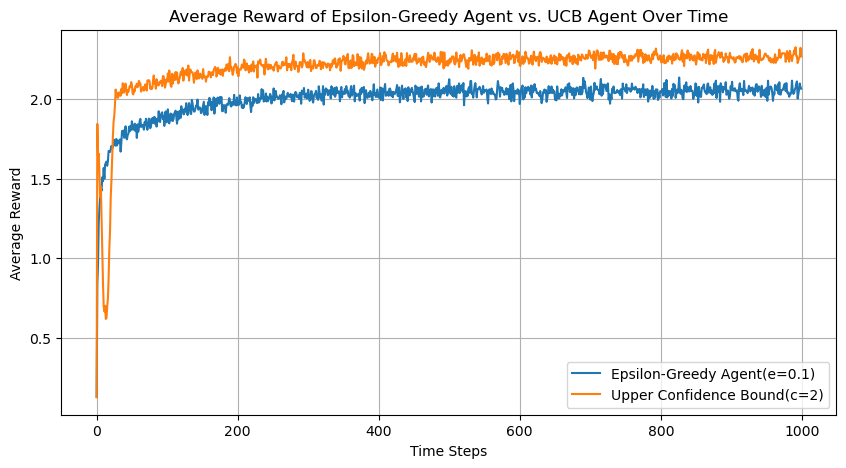

In [7]:
# Exploration rates
epsilon = 0.1

# Number of time steps and episodes
time_steps = 1000
episodes = 2000
c=2

# Placeholder for average rewards of epsilon-greedy agent and best possible action
avg_rewards = np.zeros(time_steps) 
avg_rewards_UCB= np.zeros(time_steps)

for episode in range(episodes):
    # Initialize action values and counts
    Q1 = np.zeros(k)
    Q2 = np.zeros(k)
    N2 = np.ones(k)  # Initialize to 1 to avoid division by zero
    N1 = np.ones(k)  # Initialize to 1 to avoid division by zero

    for t in range(1, time_steps+1):  # Start from 1 to avoid log(0)
        if np.random.rand() < epsilon:
                A1 = np.random.choice(k)  # Explore
        else:
            A1 = np.argmax(Q1)  # Exploit
            
        A2 = np.argmax(Q2+c*(np.sqrt(np.log(t) / N2)))  # Exploit

        # Reward from the reward distribution
        R1 = np.random.choice(rewards[A1])
        R2 = np.random.choice(rewards[A2])

        # Update the count of actions
        N1[A1] += 1
        N2[A2] += 1

        # Update the estimated value of the chosen action
        Q1[A1] += (R1 - Q1[A1]) / N1[A1]
        Q2[A2] += (R2 - Q2[A2]) / N2[A2]

        # Update the average rewards 
        avg_rewards[t-1] += R1  
        avg_rewards_UCB[t-1] += R2

# Average rewards over all episodes
avg_rewards /= episodes
avg_rewards_UCB /= episodes   

# Average rewards over time
plt.figure(figsize=(10,5))  # Increase figure size
plt.plot(avg_rewards, label='Epsilon-Greedy Agent(e=0.1)') 
plt.plot(avg_rewards_UCB, label='Upper Confidence Bound(c=2)') 
        
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.grid(True)  # Add gridlines
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent vs. UCB Agent Over Time')
plt.show()


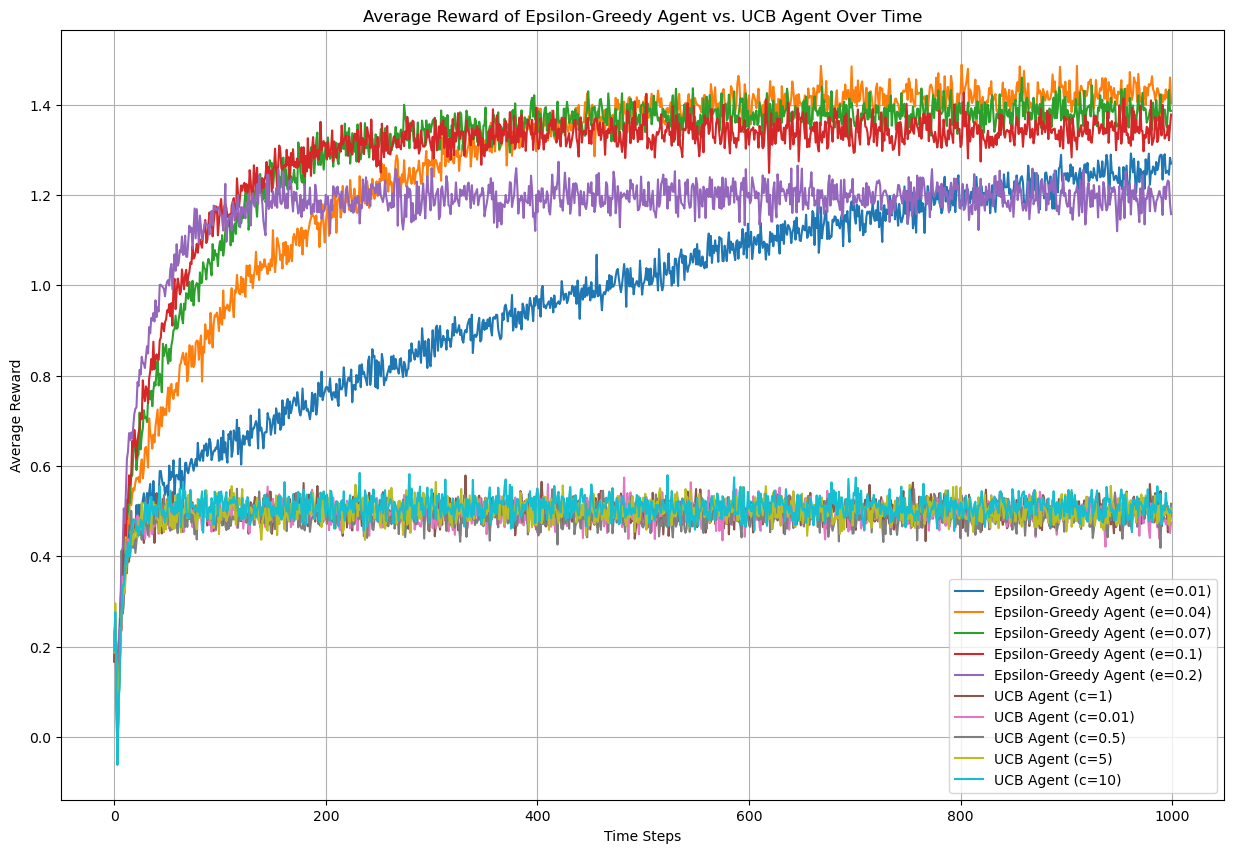

In [7]:
time_steps = 1000
episodes = 2000
k = 10 

# Exploration rates
epsilons = [0.01,0.04,0.07,0.1,0.2]

# Values of c for UCB
cs = [1, 0.01, 0.5, 5,10]


# Initialize average rewards for each epsilon and c
avg_rewards_epsilon = {eps:np.zeros(time_steps)for eps in epsilons}
avg_rewards_UCB = {c_val: np.zeros(time_steps) for c_val in cs}

# Loop for epsilon-greedy agent
for eps in epsilons:
    for episode in range(episodes):
        Q1 = np.zeros(k)
        N1 = np.ones(k)  # Initialize to 1 to avoid division by zero

        for t in range(1, time_steps+1):  # Start from 1 to avoid log(0)
            if np.random.rand() < eps:
                A1 = np.random.choice(k)  # Explore
            else:
                A1 = np.argmax(Q1)  # Exploit
        
            R1 = np.random.choice(rewards[A1])
            N1[A1] += 1
            Q1[A1] += (R1 - Q1[A1]) / N1[A1]
            avg_rewards_epsilon[eps][t-1] += R1

    # Average rewards over all episodes for epsilon-greedy agent
    avg_rewards_epsilon[eps] /= episodes


# Loop for UCB agent
for c in cs:
    for episode in range(episodes):
        Q2 = np.zeros(k)
        N2 = np.ones(k)  # Initialize to 1 to avoid division by zero
        
        for t in range(1, time_steps+1):  # Start from 1 to avoid log(0)
            if t==1:
                A2 = np.argmax(Q2 )  # UCB
            else:
                A2 = np.argmax(Q2 + c * (np.sqrt(np.log(t) / N2[A2])))  # UCB
            R2 = np.random.choice(rewards[A2])
            N2[A2] += 1
            Q2[A2] += (R2 - Q2[A2]) / N2[A2]
            avg_rewards_UCB[c][t-1] += R2

    # Average rewards over all episodes for each c value
    avg_rewards_UCB[c] /= episodes

# Plotting
plt.figure(figsize=(15, 10))

# Plot for different epsilons
for eps, rewards in avg_rewards_epsilon.items():
    plt.plot(rewards, label=f'Epsilon-Greedy Agent (e={eps})')

# Plot for different c values of UCB agent
for c_val, rewards in avg_rewards_UCB.items():
    plt.plot(rewards, label=f'UCB Agent (c={c_val})')

plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.grid(True)
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent vs. UCB Agent Over Time')
plt.show()
